<a href="https://colab.research.google.com/github/Bageshri123/Bageshri-Portfolio/blob/main/Performing_statistical_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Skills Covered**
1.   Finding measures of central tendency (max, min, mean, median)
2.   Finding standard deviation



Below I have run the function get_income_df() and store the result in a new dataframe called income_df.ANd then grouped income_df by State and calculated some statistics on the groups.

In [ ]:
#to get avearge of income and population for each state
import pandas as pd

def get_income_df(url):
  county_level_df=pd.read_excel(url,sheet_name="county-level")

  state_level_df=pd.read_excel(url,sheet_name="state-level")

  income_new_df=pd.read_excel(url,sheet_name="income")

  county_level_df['Pop']=county_level_df['Population']  #to change name of column
  county_level_df.drop(['Population'],axis=1)

  state_level_df['Pop']=round(state_level_df['Pop']/1000) #to convert values to whole number
  state_level_df['Pop']=state_level_df['Pop'].astype(int)

  combined_df=pd.concat([county_level_df,state_level_df], join='inner', ignore_index=True) #to combine two dataframes
   
  income_df_v=income_new_df.append(combined_df,ignore_index=True) #to add new dataframe to combined dataframe
 

  income_df_v4=income_df_v.sort_values(['Income'],ascending=False) #to sort dataframe by Income in descending order
  
  return income_df_v4



url="https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/Income-Data.xlsx?raw=true"
income_df=get_income_df(url)

income_df[['State','Income','Pop']].groupby(['State']).mean()

,Income,Pop
State,,
CA,66.333333,31.333333
IN,46.333333,17.333333
MD,64.230769,44.384615
NY,74.333333,12.000000
TX,59.454545,39.181818


In [ ]:
#to get lowest of income and population for each state

income_df=get_income_df(url)
income_df[['State','Income','Pop']].groupby(['State']).min()

,Income,Pop
State,,
CA,54,10
IN,35,5
MD,22,5
NY,67,7
TX,45,5


In [ ]:
#to get highest of income and population for each state

income_df=get_income_df(url)
income_df[['State','Income','Pop']].groupby(['State']).max()

,Income,Pop
State,,
CA,78,54
IN,69,24
MD,81,98
NY,78,18
TX,75,82


In [ ]:
#to get statistics of Income, Age, Population for each state

income_df=get_income_df(url)
income_df.groupby('State').agg(
    {
       "Age" :['min','max','mean','std','median'],
       "Income":['min','max','mean','std','median'],
       "Pop" :['min','max','mean','std','median']
    }
)

Age                                  ... Pop                                 
      min max       mean       std median  ... min max       mean        std median
State                                      ...                                     
CA     29  35  33.000000  3.464102     35  ...  10  54  31.333333  22.030282     30
IN     32  41  38.000000  5.196152     41  ...   5  24  17.333333  10.692677     23
MD     22  41  28.076923  5.203549     27  ...   5  98  44.384615  30.845147     34
NY     29  34  32.333333  2.886751     34  ...   7  18  12.000000   5.567764     11
TX     23  42  34.181818  6.161464     35  ...   5  82  39.181818  26.049254     28

[5 rows x 15 columns]

These statstics shows, Maryland has lowest average age and highest average population.Although New York has lowest average population, it's average income is highest.Average age for Texas, New York and California is close by but still there is a big differance between average income and average population for these 3 states.

Indiana and Maryland have the same maximum age but quiet different minimum age. For population these two states have same minimum population but a big differance in maximum population.

**Skills covered**

Performing a linear regression

**Describing the data relatively**


In this code below, I have used a library scipy. Scipy is library of functions for interpolating, optimising, linear regression, etc.

I have used linear regression to check if the columns 'Age' and 'Income' closely related in the data set 'Income-Data'.

The result of the linregress function is a set of variables:

slope, intercept - the gradient and y-intercept of the regression line (the line of best fit between the two series) are in regression.slope and regression.intercept

rvalue - the correlation coefficient - this indicates how closely the line drawn from the linear regression data fits the actual data, the closer to 1 the better the fit

pvalue - the probability of error if the regression line is extended to predict
the standard error is in regression.stderr and is the average distance of each data point from the line of best fit.

In [ ]:
import pandas as pd
from scipy.stats import linregress

url="https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/Income-Data.xlsx?raw=true"
county_level_df = pd.read_excel(url, sheet_name = "county-level")

x = county_level_df['Age']
y = county_level_df['Income'] 

regression = linregress(x,y)
print(regression)

#display the slope
print("\nSlope:",regression.slope)

# display the intercept
print("\nIntercept:",regression.intercept)

# calculate and display r_squared
r_squared = regression.rvalue**2
print("\nr-squared:",r_squared)

LinregressResult(slope=-0.31433084434233205, intercept=72.78388856978748, rvalue=-0.14787411576068246, pvalue=0.5581637648902298, stderr=0.5255739814332189)

Slope: -0.31433084434233205

Intercept: 72.78388856978748

r-squared: 0.021866754112003717


The negative value of rvalue indicates that any correlation is inverse, ie as Age goes up, Income goes down

Below I have used linear regression to see if there is a clearer correlation between Population and Income.



In [ ]:
x = county_level_df['Population']
y = county_level_df['Income'] 

regression = linregress(x,y)
print(regression)

#display the slope
print("\nSlope:",regression.slope)

# display the intercept
print("\nIntercept:",regression.intercept)

# calculate and display r_squared
r_squared = regression.rvalue**2
print("\nr-squared:",r_squared)

LinregressResult(slope=0.05737132629483762, intercept=60.95698211316883, rvalue=0.11644142628402862, pvalue=0.6454275157910035, stderr=0.12233846479490115)

Slope: 0.05737132629483762

Intercept: 60.95698211316883

r-squared: 0.013558605755058871


Slope is positive (0.05737). This indicates that the line plotting Population against Income slopes upwords. That means income increases if population increases. *Intercept value indicates that income level starts at 60.956982 and increase from there by population. *r squared value(0.0135586) indiactes a weak corelation between population and income. The r value is positive which indicates there is a direct co realtion. If population goes up, income increases.

Below is the code to perform linear regression to check if stress predict wellbeing.I have written a function to check and display significance of regression.

In [ ]:
import pandas as pd
from scipy.stats import linregress

#function to check significance of a regression
def reg_significance(p):
  if p<0.05:
    print("\np value (",p,") is less than 0.05.That indiactes, Stress is significant in predicting wellbeing")
  else:
    print("\np value (",p,") is greater than 0.05. That indicates, there is no statistical significance between Stress and wellbeing.")


url="https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"
wellbeing_df = pd.read_csv(url)

x=wellbeing_df['Stress']
y=wellbeing_df['Wellbeing']

regression = linregress(x,y)
print(regression)

print("\nr squared:", regression.rvalue**2)

reg_significance(regression.pvalue)


LinregressResult(slope=-0.6279050248852254, intercept=37.713488379900454, rvalue=-0.6713959740851134, pvalue=6.084540561441803e-07, stderr=0.10694652962765022)

r squared: 0.4507725540176983

p value ( 6.084540561441803e-07 ) is less than 0.05.That indiactes, Stress is significant in predicting wellbeing


Slope is negative (-0.627905) which means line plotting stress against wellbeing slopes downwords. Which indicates wellbeing increases if stress decreases. Although  r squared value 0.45 indicates this correaltion is weak or low effect size.

**Linear regression and scatterplot for normal data**

I have performed a linear regression to find a line of best fit between Resilliance (x) and selfesteem (y)

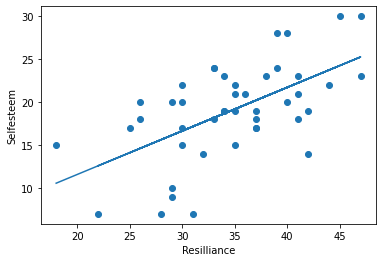

In [11]:
from scipy.stats import linregress

x=psych_df['Resilliance']
y=psych_df['selfesteem']

plt.scatter(x,y)
plt.xlabel('Resilliance')
plt.ylabel('Selfesteem')

regression=linregress(x,y)
slope = regression.slope
intercept = regression.intercept
plt.plot(x, slope*x + intercept)

plt.show()

The line of best fit is sloping upwords, indicating positive relationship between Selfesteem and Resilliance. The points on the graph are more scattered about the trend line. This indicates the the correaltion is not very strong.

**Skills Covered**

Checking for normal distribution



**Testing for normality Graphically**

Below, I have used Psychological Wellbeing dataset.I have imported pandas and   matplotlib.plyplot (used for creating static, animated, and interactive visualizations)libraries.I have used df.info() and df.describe() to understand and get familarise with the data Then I have plotted histogram to check of  Resilliance to check if data is normally distributed.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

url="https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"
psych_df=pd.read_csv(url)

psych_df.head()

,Age,English,firstlanguage,sex,origin,Ukresidence,MAAS,Resilliance,Wellbeing,Stress,selfesteem,LoC,sleep,Year
0,24,Your Second Language,Arabic,Female,Outside Europe,0.0,4.60,44,26,19,22,10,32,2017
1,22,Your Second Language,Arabic,Female,Outside Europe,0.0,2.60,29,10,37,9,16,10,2017
2,26,Your Second Language,Burmese,Female,Outside Europe,0.0,4.13,26,20,20,18,20,24,2017
3,23,Your Second Language,Chinese,Male,Outside Europe,0.0,2.77,30,16,28,20,17,10,2017
4,25,Your Second Language,Chinese,Female,Outside Europe,0.0,3.80,33,27,15,18,12,17,2017


In [2]:
psych_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            44 non-null     int64  
 1   English        44 non-null     object 
 2   firstlanguage  18 non-null     object 
 3   sex            44 non-null     object 
 4   origin         44 non-null     object 
 5   Ukresidence    44 non-null     float64
 6   MAAS           44 non-null     float64
 7   Resilliance    44 non-null     int64  
 8   Wellbeing      44 non-null     int64  
 9   Stress         44 non-null     int64  
 10  selfesteem     44 non-null     int64  
 11  LoC            44 non-null     int64  
 12  sleep          44 non-null     int64  
 13  Year           44 non-null     int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 4.9+ KB


In [3]:
psych_df.describe()

,Age,Ukresidence,MAAS,Resilliance,Wellbeing,Stress,selfesteem,LoC,sleep,Year
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.0
mean,26.568182,8.193182,3.788636,34.681818,24.113636,21.659091,19.022727,12.045455,20.727273,2017.0
std,8.968673,11.121536,0.866824,6.461956,7.421577,7.935622,5.534201,5.709863,8.420251,0.0
min,14.000000,0.000000,2.300000,18.000000,7.000000,3.000000,7.000000,4.000000,4.000000,2017.0
25%,22.750000,0.000000,3.225000,30.000000,20.000000,18.500000,17.000000,8.000000,12.750000,2017.0
50%,24.000000,1.500000,3.915000,35.000000,25.500000,21.500000,19.000000,11.500000,23.500000,2017.0
75%,26.250000,19.750000,4.325000,39.250000,28.250000,28.000000,22.250000,16.000000,28.000000,2017.0
max,74.000000,30.000000,6.700000,47.000000,38.000000,37.000000,30.000000,27.000000,32.000000,2017.0


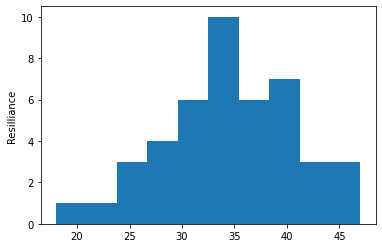

In [4]:
data=psych_df['Resilliance']
plt.hist(data)
plt.ylabel('Resilliance')

plt.show()

In the histogram above the data looks normally distributed. But the shape is rough so, it is not entirely obvious. To get a better idea, I have performed probability plot below. To perform the probability plot, I have loaded in another library : stats from scipy.

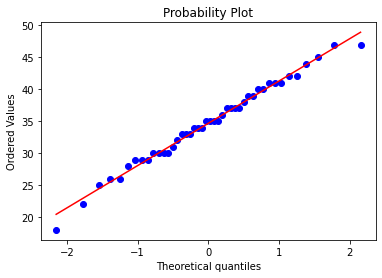

In [5]:
from scipy import stats

data=psych_df['Resilliance']
stats.probplot(data,plot=plt)

plt.show()

In this probability plot, we can see that, the dots (actual data) follow the theoretical line on the plot, it shows the 2 are similar and therefore normally distributed.

**Histogram of non-Gaussian data**

For this, I have used US election data.I checked data for missing values and have used dropna() to drop records with null values. Once, data was cleaned, I plotted histogram of national_turnout to check if the data is normally distributed.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

url="https://raw.githubusercontent.com/futureCodersSE/working-with-data/main/Data%20sets/Data%20Cleaning%20Data%20Sets/presDirty.csv?raw=true"
election_df=pd.read_csv(url)

election_df.head()

,cycle,branch,model,modeldate,candidate_inc,candidate_chal,nat_voteshare_other_hi,national_voteshare_inc_lo,national_voteshare_chal_lo,national_voteshare_3rd_lo,nat_voteshare_other_lo,national_turnout,national_turnout_hi,national_turnout_lo,timestamp,simulations
0,2020,President,polls-plus,11/03/2020,Trump,Biden,1.842986,42.91262,50.87952,NaN,0.724433,157972048.0,168424640.0,147487920.0,03/11/2020 00:00,40000
1,2020,President,polls-plus,11/02/2020,Trump,Biden,1.842986,42.91348,50.88025,NaN,0.724433,157972048.0,168424640.0,147487920.0,02/11/2020 23:45,40000
2,2020,President,polls-plus,11/02/2020,Trump,Biden,1.842986,42.91348,50.88025,NaN,0.724433,157972048.0,168424640.0,147487920.0,02/11/2020 23:45,40000
3,2020,President,polls-plus,10/31/2020,Trump,Biden,1.835479,42.98096,50.74764,NaN,0.689802,158044784.0,168497376.0,147560672.0,31/10/2020 22:23,40000
4,2020,President,polls-plus,10/30/2020,Trump,Biden,1.847821,42.92510,50.72821,NaN,0.692837,156723120.0,167175712.0,146239008.0,30/10/2020 21:34,40000


In [7]:
election_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   cycle                       156 non-null    int64  
 1   branch                      156 non-null    object 
 2   model                       156 non-null    object 
 3   modeldate                   156 non-null    object 
 4   candidate_inc               156 non-null    object 
 5   candidate_chal              156 non-null    object 
 6   nat_voteshare_other_hi      156 non-null    float64
 7   national_voteshare_inc_lo   156 non-null    float64
 8   national_voteshare_chal_lo  156 non-null    float64
 9   national_voteshare_3rd_lo   0 non-null      float64
 10  nat_voteshare_other_lo      156 non-null    float64
 11  national_turnout            59 non-null     float64
 12  national_turnout_hi         59 non-null     float64
 13  national_turnout_lo         59 non-

In [8]:
election_df1=election_df
election_df1.drop('national_voteshare_3rd_lo',inplace=True,axis=1)

election_df1=election_df1.dropna()

election_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 0 to 58
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   cycle                       59 non-null     int64  
 1   branch                      59 non-null     object 
 2   model                       59 non-null     object 
 3   modeldate                   59 non-null     object 
 4   candidate_inc               59 non-null     object 
 5   candidate_chal              59 non-null     object 
 6   nat_voteshare_other_hi      59 non-null     float64
 7   national_voteshare_inc_lo   59 non-null     float64
 8   national_voteshare_chal_lo  59 non-null     float64
 9   nat_voteshare_other_lo      59 non-null     float64
 10  national_turnout            59 non-null     float64
 11  national_turnout_hi         59 non-null     float64
 12  national_turnout_lo         59 non-null     float64
 13  timestamp                   59 non-nu

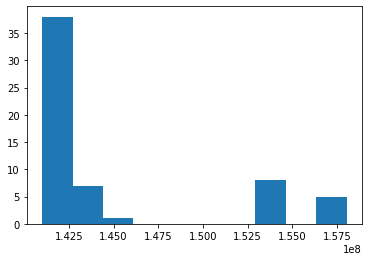

In [9]:
data=election_df1['national_turnout']
plt.hist(data)

plt.show()

Looking at the shape of Histogram, the data doesn't look normally distributed. Let's do another check by plotting probability plot for the same data.

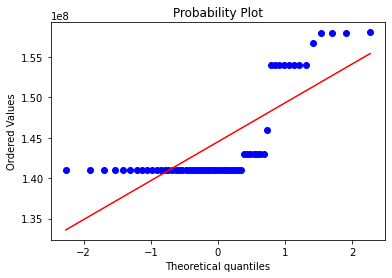

In [10]:
stats.probplot(data,plot=plt)
plt.show()

We can see that, the dots (actual data) do not follow the theoretical line on the plot. Hence, the data is not normally distributed. 